In [1]:
import pandas as pd

# Load the dataset
bird_data = pd.read_excel("/Users/zhujungao/Desktop/Presentation/NCRN LAND Bird Monitoring Data 2007 - 2017_Public.xlsx")

# Display the first few rows of the dataset
bird_data.head()


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,85824,ACFL,False,True,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,88038,BGGN,False,False,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,85824,ACFL,False,True,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
3,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,95300,AMGO,False,False,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
4,ANTI,NaN,ANTI 2,ANTI-0207,Forest,2008,2008-05-28,06:42:00,06:52:00,Desiree Narango,...,87106,AMCR,False,False,15.6,57.0,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True


In [9]:
#Data Cleaning
# Check for duplicates
duplicates = bird_data.duplicated().sum()

# Check for missing values
missing_values = bird_data.isnull().sum()

(duplicates, missing_values)

# Remove duplicate rows
bird_data_cleaned = bird_data.drop_duplicates()

# Drop columns with a large number of missing values that may not be critical
columns_to_drop = ['Sub_Unit_Code', 'Site_Name']  
bird_data_cleaned = bird_data_cleaned.drop(columns=columns_to_drop)

# For other columns with missing values, see what proportion of the data is missing
missing_proportion = bird_data_cleaned.isnull().sum() / len(bird_data_cleaned)

# If the proportion of missing data is small, may consider dropping those rows
# or filling in with most common value
columns_with_few_missing = missing_proportion[(missing_proportion > 0) & (missing_proportion < 0.05)].index.tolist()
bird_data_cleaned[columns_with_few_missing].describe(include='all')  

# Fill missing values in 'ID_Method' and 'Sex' with the most common value
bird_data_cleaned['ID_Method'].fillna(bird_data_cleaned['ID_Method'].mode()[0], inplace=True)
bird_data_cleaned['Sex'].fillna(bird_data_cleaned['Sex'].mode()[0], inplace=True)

# Drop rows where 'AcceptedTSN' is missing
bird_data_cleaned.dropna(subset=['AcceptedTSN'], inplace=True)

# Check the dataset after cleaning
cleaned_summary = {
    "Remaining rows": len(bird_data_cleaned),
    "Missing values after cleaning": bird_data_cleaned.isnull().sum().sum()
}

cleaned_summary, bird_data_cleaned.head()



({'Remaining rows': 12342, 'Missing values after cleaning': 1206},
   Admin_Unit_Code  Plot_Name Location_Type  Year       Date Start_Time  \
 0            ANTI  ANTI-0207        Forest  2008 2008-05-28   06:42:00   
 1            ANTI  ANTI-0207        Forest  2008 2008-05-28   06:42:00   
 2            ANTI  ANTI-0207        Forest  2008 2008-05-28   06:42:00   
 3            ANTI  ANTI-0207        Forest  2008 2008-05-28   06:42:00   
 4            ANTI  ANTI-0207        Forest  2008 2008-05-28   06:42:00   
 
    End_Time         Observer  Visit Interval_Length  ... NPSTaxonCode  \
 0  06:52:00  Desiree Narango      1       0-2.5 min  ...        85824   
 1  06:52:00  Desiree Narango      1       0-2.5 min  ...        88038   
 2  06:52:00  Desiree Narango      1       0-2.5 min  ...        85824   
 3  06:52:00  Desiree Narango      1       0-2.5 min  ...        95300   
 4  06:52:00  Desiree Narango      1       0-2.5 min  ...        87106   
 
   AOU_Code  PIF_Watchlist_Status R

In [8]:
# Create a table summarizing the number of observations by year and location type
observations_summary_table = bird_data_cleaned.groupby(['Year', 'Location_Type']).size().unstack(fill_value=0)


observations_summary_table


Location_Type,Forest,Grassland
Year,,
2007,196,0
2008,202,0
2009,159,0
2010,174,0
2011,159,0
2012,151,0
2013,198,0
2014,493,0
2015,370,3209


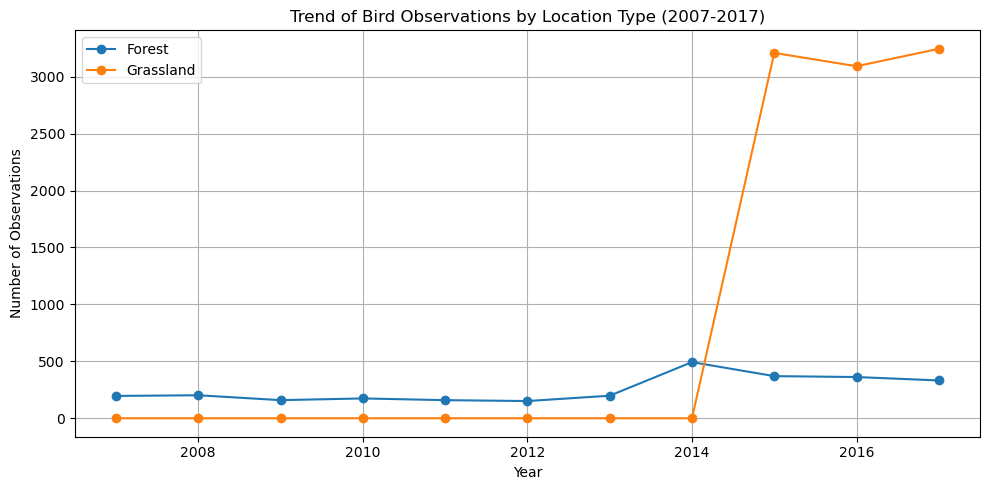

In [23]:
import matplotlib.pyplot as plt

# Line plot for the trend of bird observations over the years for each location type
plt.figure(figsize=(10, 5))
for location in observations_summary_table.columns:
    plt.plot(observations_summary_table.index, observations_summary_table[location], marker='o', label=location)

plt.title('Trend of Bird Observations by Location Type (2007-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the figure
line_plot_path = '/Users/zhujungao/Desktop/Presentation/bird_observations_trend.png'
plt.savefig(line_plot_path)

plt.show()


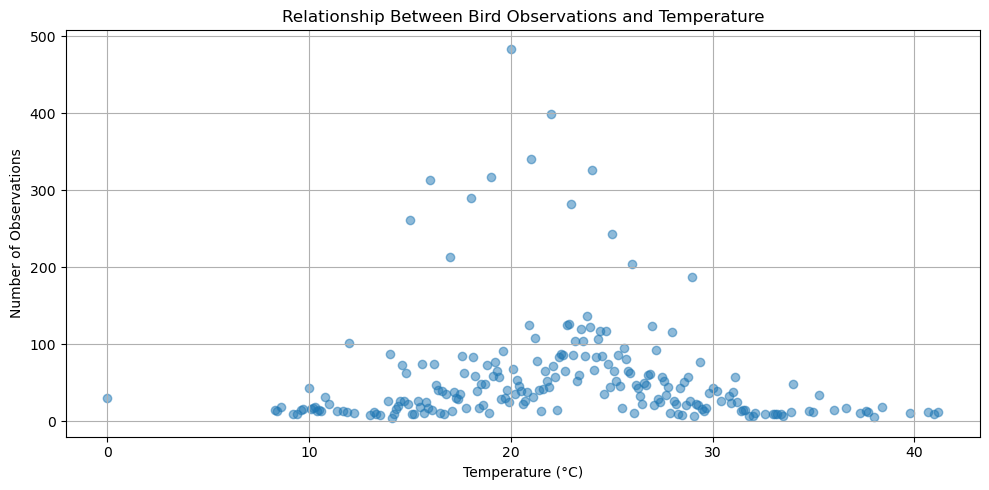

'/Users/zhujungao/Desktop/Presentation/bird_observations_trend.png'

In [24]:
# scatter plot to explore the relationship between bird observations and temperature
temperature_observation_counts = bird_data_cleaned.groupby('Temperature').size().reset_index(name='Observation_Count')

plt.figure(figsize=(10, 5))
plt.scatter(temperature_observation_counts['Temperature'], temperature_observation_counts['Observation_Count'], alpha=0.5)
plt.title('Relationship Between Bird Observations and Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Observations')
plt.grid(True)
plt.tight_layout()

# Save the figure
scatter_plot_path = '/Users/zhujungao/Desktop/Presentation/bird_observations_trend.png'
plt.savefig(scatter_plot_path)

plt.show()

scatter_plot_path
